In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

In [2]:
df = pd.read_csv('../Data/EnergyProduction.csv', index_col=0, parse_dates=True)

In [3]:
df.index.freq= 'MS'

In [4]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

In [5]:
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [6]:
#  Plot the dataset

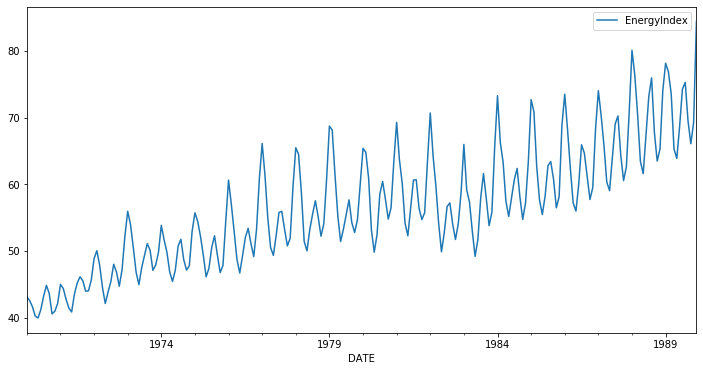

In [7]:
df.plot();

In [8]:
# Add a column that shows a 12-month Simple Moving Average (SMA).
#     Plot the result.

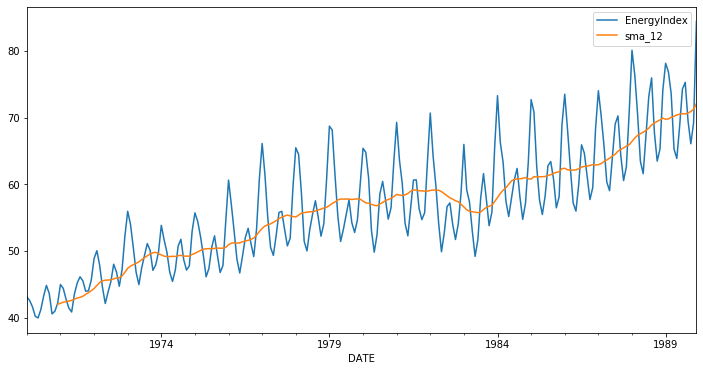

In [9]:
df['sma_12'] = df['EnergyIndex'].rolling(window=12).mean()
df.plot();

In [10]:
# Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels SimpleExpSmoothing function. Plot the result.

In [11]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [12]:
span=12
alpha=2/(span+1)

In [13]:
model = SimpleExpSmoothing(df['EnergyIndex'])
fitted_model = model.fit(smoothing_level=alpha, optimized=False)
df['SES_12'] = fitted_model.fittedvalues.shift(-1)

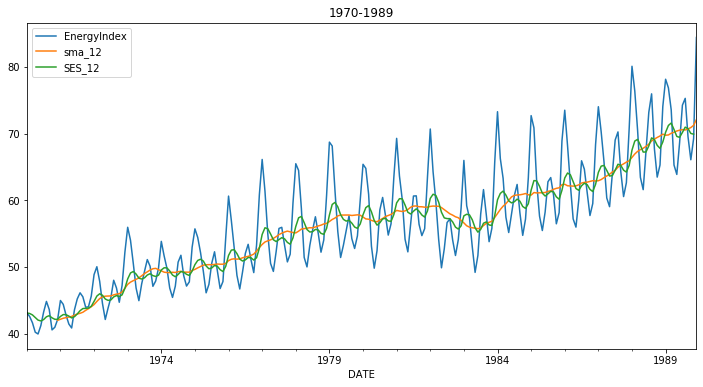

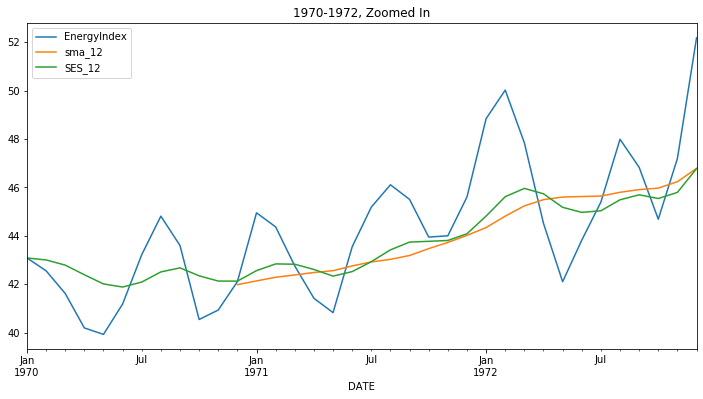

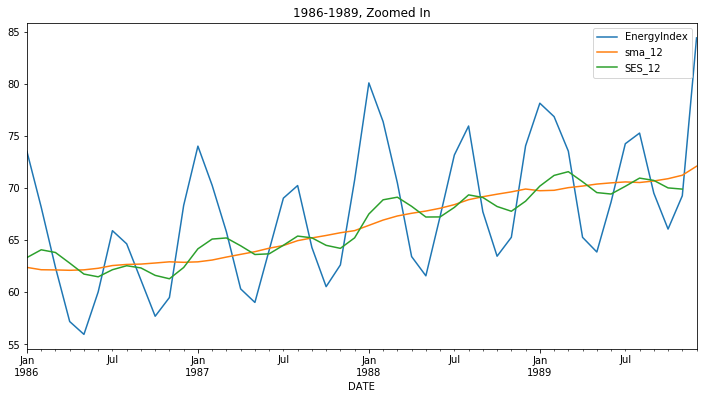

In [14]:
df.plot()
plt.title('1970-1989')
plt.show()

df.loc[:'1972'].plot()
plt.title('1970-1972, Zoomed In')
plt.show()

df.loc['1986':].plot()
plt.title('1986-1989, Zoomed In')
plt.show()



In [17]:
# Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. 
# Plot the result.

In [15]:
model = ExponentialSmoothing(df['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12)
fitted_model = model.fit()
df['TES_12'] = fitted_model.fittedvalues


C:\Users\Fida Hussain\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Fida Hussain\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Fida Hussain\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


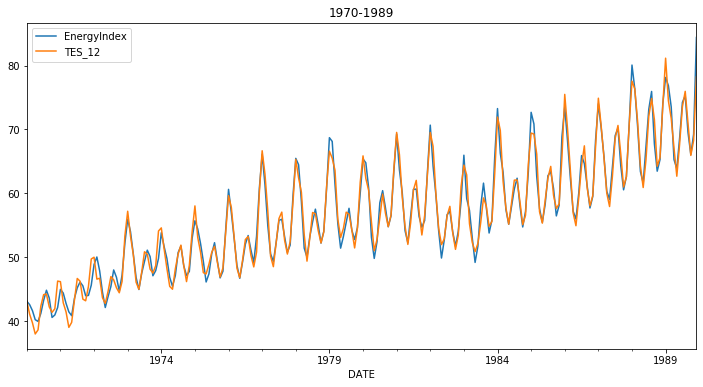

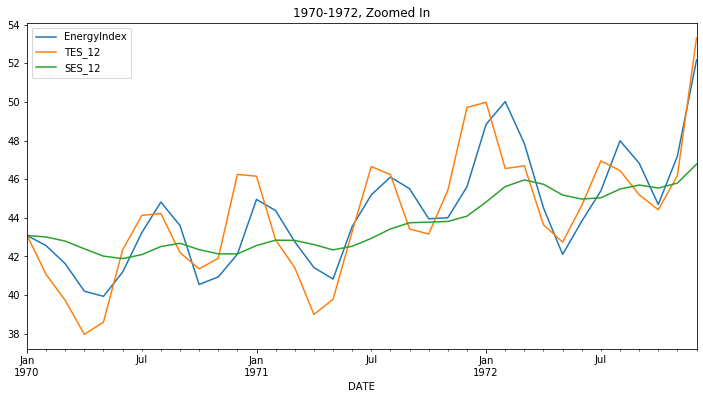

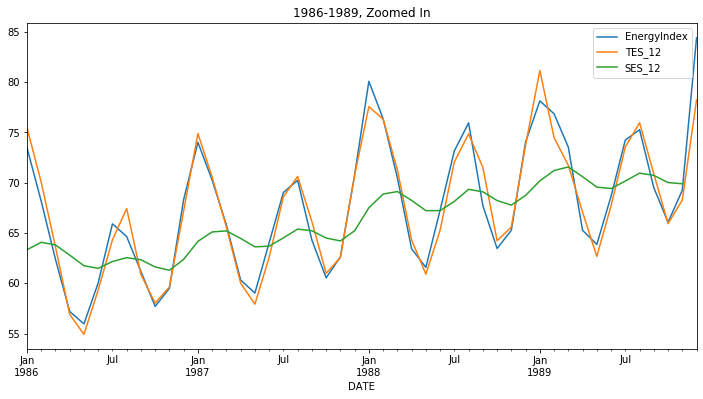

In [16]:
df.iloc[:, [0,-1]].plot()
plt.title('1970-1989')
plt.show()

df.iloc[:, [0,-1, -2]].loc[:'1972'].plot()
plt.title('1970-1972, Zoomed In')
plt.show()

df.iloc[:, [0,-1, -2]].loc['1986':].plot()
plt.title('1986-1989, Zoomed In')
plt.show()